# Model Evaluation  (MNIST Handwritten Digit Dataset)

In this notebook, we will:
- Load trained MLP and CNN models
- Evaluate them on validation and test data
- Generate predictions
- Display confusion matrix and classification metrics
- Compare final performance and insights

This step ensures our model generalizes well to unseen data.

## Step 1: Set Project Root for Python Imports

In [1]:
import os 
import sys

sys.path.append(os.path.abspath(".."))

## Step 2: Load MNIST processed dataset

In [2]:
from src.model import (
load_numpy_data,
load_models,
evaluate_mlp,
plot_mlp_cm,
mlp_classification,
evaluate_cnn,
plot_cnn_cm,
cnn_classification,
plot_cnn_misclassified
)

X_test = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\X_test.npy", "X_train")
Y_test = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\Y_test.npy", "Y_test")
X_test_cnn = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\X_test_cnn.npy", "X_test_cnn")
Y_test_cnn = load_numpy_data(r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\Data\processed\Y_test_cnn.npy", "Y_test_cnn")

X_train shape: (10000, 784)
Y_test shape: (10000,)
X_test_cnn shape: (10000, 28, 28, 1)
Y_test_cnn shape: (10000, 10)


## Step 3: Load Saved Model

In [3]:
path = r"D:\Thiru\ML_Projects\MNIST-Handwritten-Digit-Recognition\models"

mlp_model = load_models(path, "mlp_model.keras")
cnn_model = load_models(path, "cnn_model.keras")

Model Loaded successfully
Model Loaded successfully


## Step 4: Evaluate MLP on Test Set

In [4]:
mlp_test_pred, mlp_test_acc = evaluate_mlp(X_test, Y_test, mlp_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

MLP Test Accuracy: 97.93


## Step 5: Confusion Matrix MLP

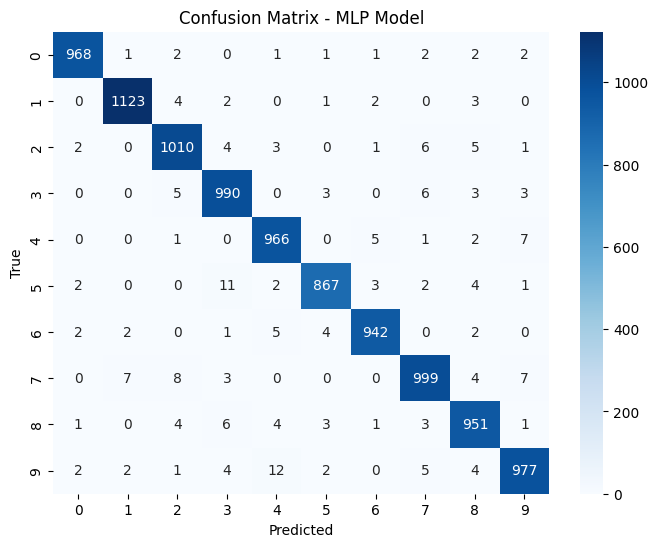

In [5]:
plot_mlp_cm(Y_test, mlp_test_pred)

## Step 6: Classification Report MLP

In [6]:
mlp_classification(Y_test, mlp_test_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Insight:
 - MLP performs well (~97–98% accuracy). Misclassifications are mostly between similar digits.

## Step 7: Evaluate CNN on Test Set

In [7]:
y_true_cnn, cnn_test_pred = evaluate_cnn(X_test_cnn, Y_test_cnn, cnn_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

CNN Test Accuracy: 99.21


## Step 7: Confusion Matrix CNN

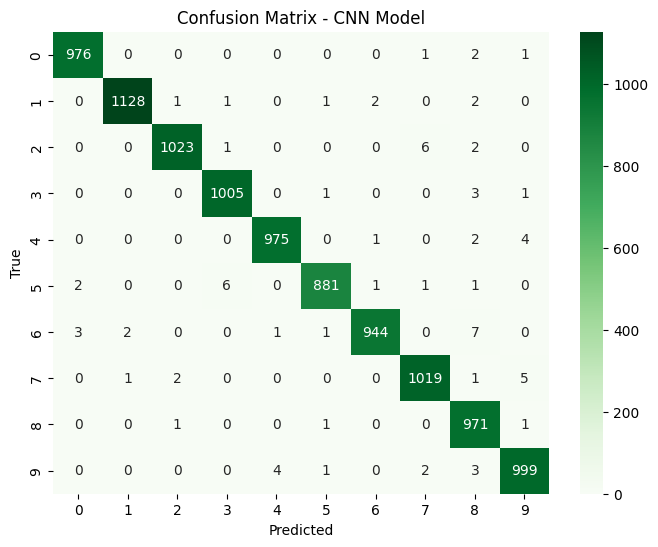

In [8]:
plot_cnn_cm(y_true_cnn, cnn_test_pred)

## Step 8: Classification Report CNN

In [9]:
cnn_classification(y_true_cnn, cnn_test_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Insight:
 - Insight: CNN achieves higher accuracy (~99%). Errors are minimal and mostly ambiguous digits.


### Step 9: Visualize Misclassified CNN Examples

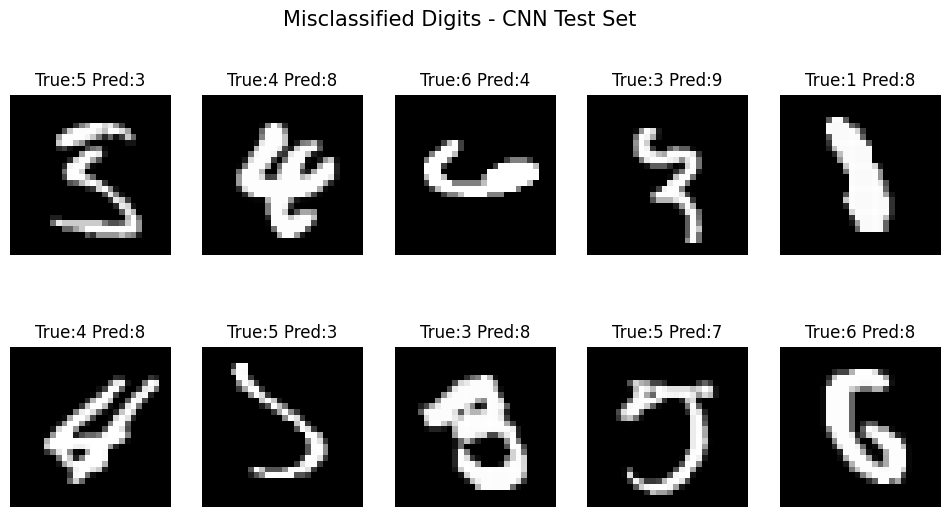

In [10]:
plot_cnn_misclassified(cnn_test_pred, y_true_cnn, X_test_cnn)

## Model Evaluation Summary

 - MLP Test Accuracy: 97.97
 - CNN Test Accuracy: 99.01
 - Confusion matrices show very few misclassifications, mostly similar digits.
 - CNN outperforms MLP due to learning spatial features from images.
 - Misclassified examples highlight ambiguous digits even for humans.